In [1]:
from keras.models import load_model

/home/tony/anaconda3/envs/tf/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model = load_model("cnn_3d_64_64_3_20180221_164250.hdf5")

In [3]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 3, 1) 0                                            
__________________________________________________________________________________________________
conv3d_1 (Conv3D)               (None, 32, 32, 2, 64 22016       input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 2, 64 256         conv3d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 32, 32, 2, 64 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
max_poolin

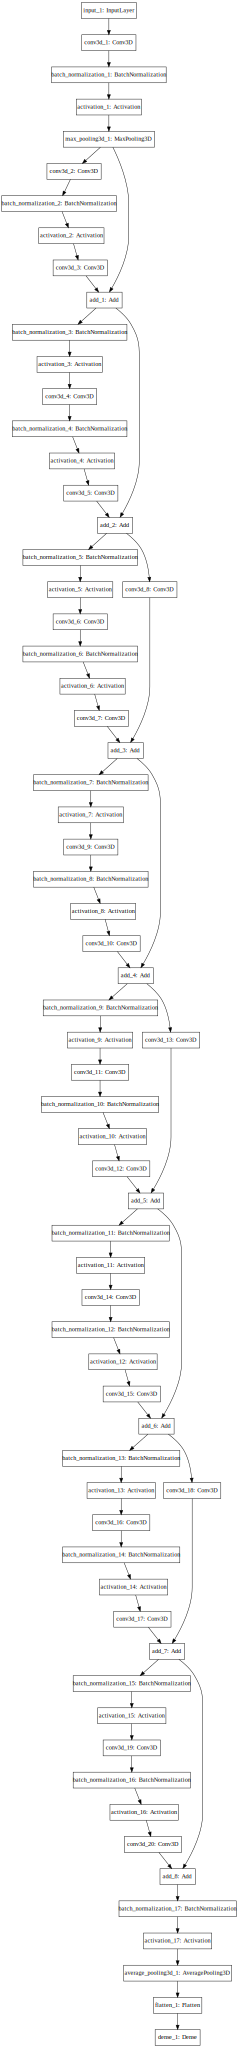

In [4]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [5]:
dot1 = model_to_dot(model).create(prog='dot', format='svg')

In [6]:
dot1

b'<?xml version="1.0" encoding="UTF-8" standalone="no"?>\n<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"\n "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n<!-- Generated by graphviz version 2.38.0 (20140413.2041)\n -->\n<!-- Title: G Pages: 1 -->\n<svg width="540pt" height="4644pt"\n viewBox="0.00 0.00 540.00 4644.00" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">\n<g id="graph0" class="graph" transform="scale(1 1) rotate(0) translate(4 4640)">\n<title>G</title>\n<polygon fill="white" stroke="none" points="-4,4 -4,-4640 536,-4640 536,4 -4,4"/>\n<!-- 139841479280176 -->\n<g id="node1" class="node"><title>139841479280176</title>\n<polygon fill="none" stroke="black" points="180.5,-4599.5 180.5,-4635.5 305.5,-4635.5 305.5,-4599.5 180.5,-4599.5"/>\n<text text-anchor="middle" x="243" y="-4613.8" font-family="Times,serif" font-size="14.00">input_1: InputLayer</text>\n</g>\n<!-- 139841479280288 -->\n<g id="node2" class="node"><title>139841479280288</title>\

In [4]:
import h5py
import numpy as np

In [56]:
df = h5py.File("/media/tony/TOSHIBA EXT/luna/LUNA16/hdf5-files/64x64x3-patch.hdf5", "r")

In [6]:
idx_subset2 = np.where(df["subsets"][:,0] == 2)[0]

In [7]:
idx_class1 = np.where(df["output"][:,0] == 1)[0]

In [8]:
idx_subset2_class1 = np.intersect1d(idx_subset2, idx_class1)

In [61]:
imgs = df["input"][idx_subset2_class1, :]

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

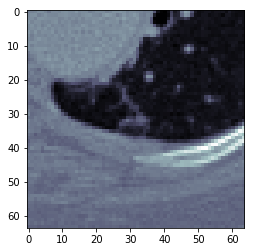

In [63]:
img = imgs[0,:]
plt.imshow(img.reshape(3,64,64)[1,:,:], cmap="bone")

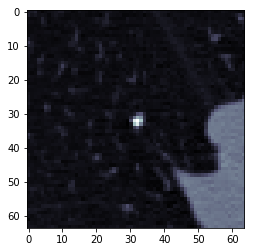

In [64]:
img = imgs[1,:]
plt.imshow(img.reshape(3,64,64)[1,:,:], cmap="bone")

(-0.5, 63.5, 63.5, -0.5)

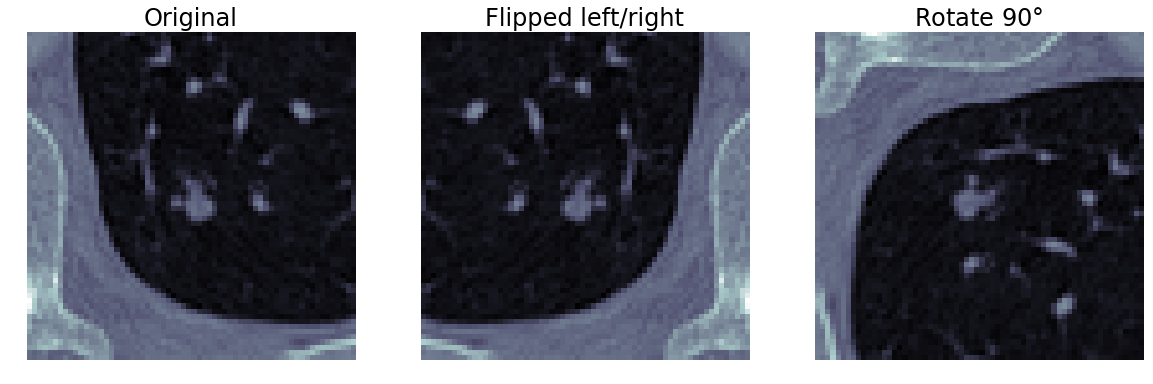

In [96]:
img = imgs[36,:]
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(img.reshape(3,64,64)[1,:,:], cmap="bone")
plt.title("Original", fontsize=24)
plt.axis("off")
plt.subplot(1,3,2)
plt.imshow(np.flip(img.reshape(3,64,64)[1,:,:],axis=1), cmap="bone")
plt.title("Flipped left/right", fontsize=24)
plt.axis("off")
plt.subplot(1,3,3)
plt.imshow(np.rot90(img.reshape(3,64,64)[1,:,:], k=-1), cmap="bone");
plt.title(r'Rotate $90\degree$', fontsize=24)
plt.axis("off")

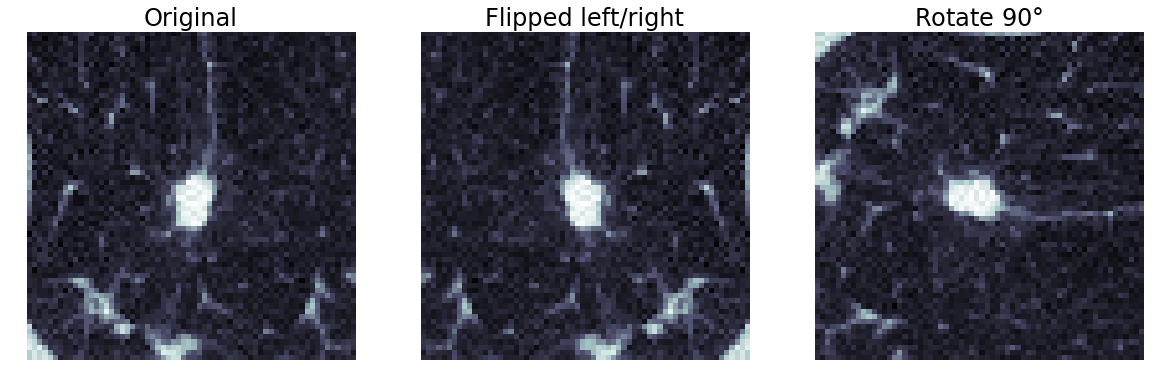

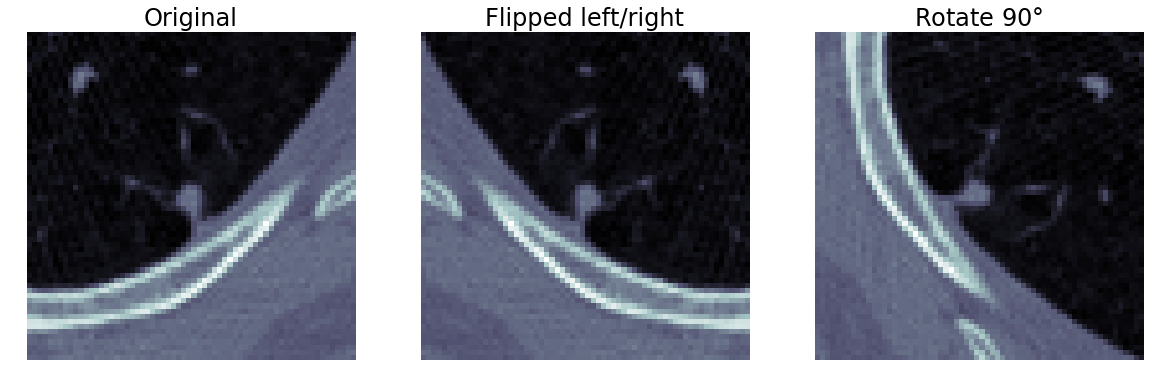

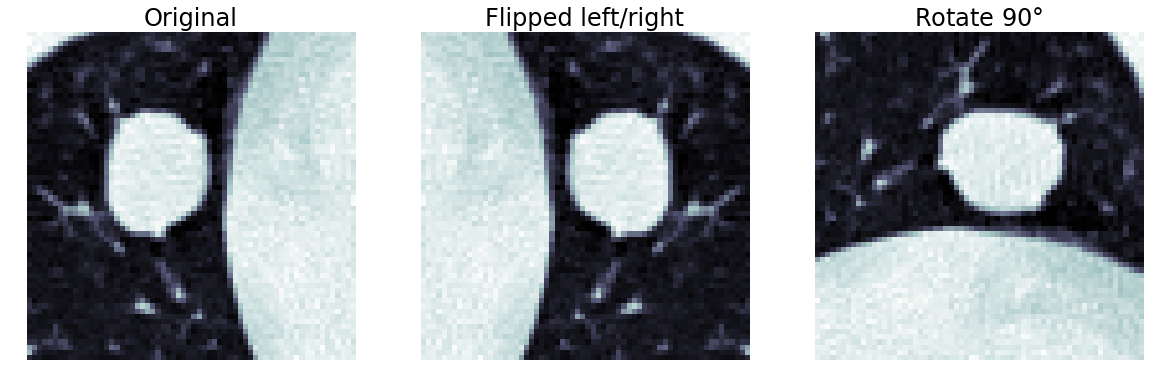

In [92]:
img = imgs[76,:]
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(img.reshape(3,64,64)[1,:,:], cmap="bone")
plt.title("Original", fontsize=24)
plt.axis("off")
plt.subplot(1,3,2)
plt.imshow(np.flip(img.reshape(3,64,64)[1,:,:],axis=1), cmap="bone")
plt.title("Flipped left/right", fontsize=24)
plt.axis("off")
plt.subplot(1,3,3)
plt.imshow(np.rot90(img.reshape(3,64,64)[1,:,:], k=-1), cmap="bone");
plt.title(r'Rotate $90\degree$', fontsize=24)
plt.axis("off");

img = imgs[5,:]
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(img.reshape(3,64,64)[1,:,:], cmap="bone")
plt.title("Original", fontsize=24)
plt.axis("off")
plt.subplot(1,3,2)
plt.imshow(np.flip(img.reshape(3,64,64)[1,:,:],axis=1), cmap="bone")
plt.title("Flipped left/right", fontsize=24)
plt.axis("off")
plt.subplot(1,3,3)
plt.imshow(np.rot90(img.reshape(3,64,64)[1,:,:], k=-1), cmap="bone");
plt.title(r'Rotate $90\degree$', fontsize=24)
plt.axis("off")

img = imgs[33,:]
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(img.reshape(3,64,64)[1,:,:], cmap="bone")
plt.title("Original", fontsize=24)
plt.axis("off")
plt.subplot(1,3,2)
plt.imshow(np.flip(img.reshape(3,64,64)[1,:,:],axis=1), cmap="bone")
plt.title("Flipped left/right", fontsize=24)
plt.axis("off")
plt.subplot(1,3,3)
plt.imshow(np.rot90(img.reshape(3,64,64)[1,:,:], k=-1), cmap="bone");
plt.title(r'Rotate $90\degree$', fontsize=24)
plt.axis("off");



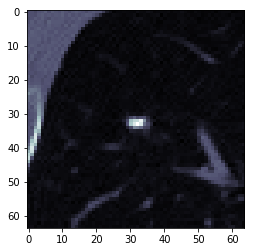

In [14]:
img = imgs[121,:]
plt.imshow(img.reshape(3,64,64)[1,:,:], cmap="bone")

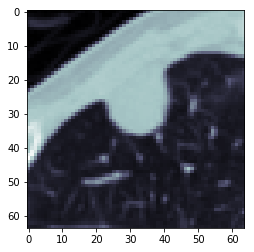

In [15]:
img = imgs[80,:]
plt.imshow(img.reshape(3,64,64)[1,:,:], cmap="bone")

In [16]:
imgs_reshaped = imgs.reshape(len(idx_subset2_class1), 3, 64, 64, 1).swapaxes(1,3)

In [17]:
predictions = model.predict(imgs_reshaped)

In [19]:
sum(predictions > 0.5)

array([106])

In [20]:
len(predictions)

181

## Predict all subset 2

In [21]:
imgs = df["input"][idx_subset2, :]
imgs_reshaped = imgs.reshape(len(idx_subset2), 3, 64, 64, 1).swapaxes(1,3)

In [22]:
predictions = model.predict(imgs_reshaped, verbose=2)

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
y_true = imgs = df["output"][idx_subset2, :]

In [26]:
predictions

array([[6.2111081e-07],
       [1.6458496e-06],
       [7.3798592e-06],
       ...,
       [6.0027673e-06],
       [6.5081199e-06],
       [1.5635882e-05]], dtype=float32)

In [27]:
confusion_matrix(y_true, np.round(predictions))

array([[74108,   156],
       [   75,   106]])

In [30]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score

print("Recall = {}".format(recall_score(y_true, np.round(predictions))))
print("Precision = {}".format(precision_score(y_true, np.round(predictions))))
print("AUC = {}".format(roc_auc_score(y_true, predictions)))
      

Recall = 0.585635359116022
Precision = 0.40458015267175573
AUC = 0.9487333675351426


In [33]:
from sklearn.metrics import roc_curve, auc
# Compute micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_true, predictions)
roc_auc = auc(fpr, tpr)

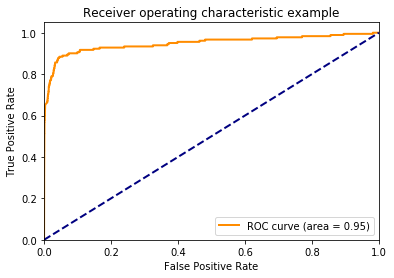

In [34]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [35]:
import pandas as pd

In [46]:
d = np.array([predictions, y_true])

In [51]:
dfp = pd.DataFrame(d[:,:,0].transpose())
dfp.columns = ["Prediction", "Truth"]

In [55]:
dfp.to_csv("anil_subset2.csv")